In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## one dimensional

In [10]:
w_0 = 0
sigma_0 = 0.1

n_trials = 50
obs = np.ones(n_trials)
rew = np.concatenate((np.ones(n_trials//2), np.zeros(n_trials-n_trials//2)))
mem_w = []
sigma_o = 0.5

tau = 0.1

pi = 0.0075


In [11]:

w = w_0
sigma = sigma_0
mem_w = []
mem_sigma = []
for t in range(n_trials):
    # maj model
    w_tilde = w 
    sigma_tilde = np.sqrt(sigma**2 + tau**2)
    x, r = obs[t], rew[t]
    r_tilde = w_tilde * x
    delta = r - r_tilde
    k = (sigma_tilde**2 * x) / (sigma_tilde**2 * x**2 + sigma_o**2) # Kalman gain
    w = w_tilde + k * delta
    sigma = np.sqrt(sigma_tilde**2 - k * x * sigma_tilde**2)
    #print(f"jump : {log_p_jump}, no_jump : {log_p_no_jump}, JUMP={jump}")
    mem_w += [w]
    mem_sigma += [sigma]
mem_w = np.array(mem_w)
mem_sigma = np.array(mem_sigma)
    
    

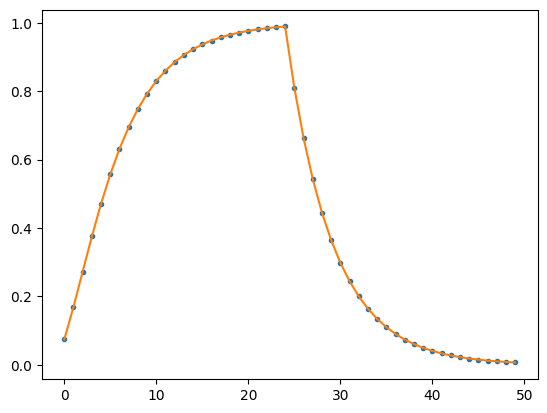

In [12]:
plt.plot(range(n_trials), mem_w, '.')
plt.plot(mem_w)

## two_dimensional

In [33]:
w_0 = np.zeros(2)
Sigma_0 = np.eye(2) * 0.1


n_trials = 50
# AB+ | A-
obs = np.array([[1,1]] * (n_trials//2) + [[1,0]] * (n_trials-n_trials//2))
rew = np.concatenate((np.ones(n_trials//2), np.zeros(n_trials-n_trials//2)))
# AB+ | B+
# obs = np.array([[1,1]] * (n_trials//2) + [[0,1]] * (n_trials-n_trials//2))
# rew = np.ones(n_trials)
# A+ | AB+
# obs = np.array([[1,0]] * (n_trials//2) + [[1,1]] * (n_trials-n_trials//2))
# rew = np.ones(n_trials)


mem_w = []
mem_Sigma = []


sigma_o = 0.5

tau = 0.1


In [34]:
n_samples = 50

w = w_0
Sigma = Sigma_0
mem_w = []
mem_Sigma = []

for t in range(n_trials):
    # maj model
    w_tilde = w 
    Sigma_tilde = Sigma + tau**2 * np.eye(2)
    x, r = obs[t], rew[t]
    r_tilde = np.dot(w_tilde, x)
    delta = r - r_tilde
    
    k = np.dot(x, Sigma_tilde) / (np.dot(x, np.dot(Sigma_tilde, x.T))  + sigma_o**2) # Kalman gain
    
    w = w_tilde +  k * delta
    Sigma = Sigma_tilde - np.dot(np.outer(k, x), Sigma_tilde)
    #print(f"jump : {log_p_jump}, no_jump : {log_p_no_jump}, JUMP={jump}")
    mem_w += [w]
    mem_Sigma += [Sigma]
mem_w = np.array(mem_w)
mem_Sigma = np.array(mem_Sigma)


    

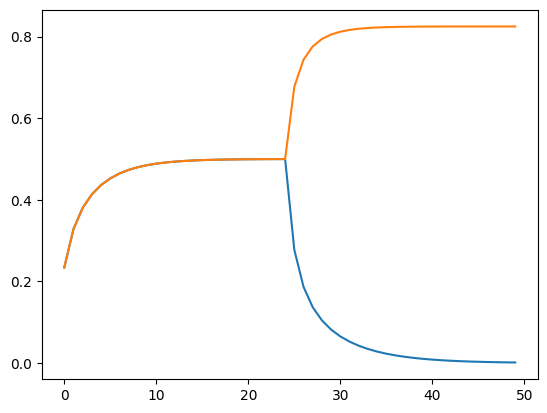

In [35]:

plt.plot(mem_w[:,0])
plt.plot(mem_w[:,1])

(-0.5, 1.5, 1.5, -0.5)

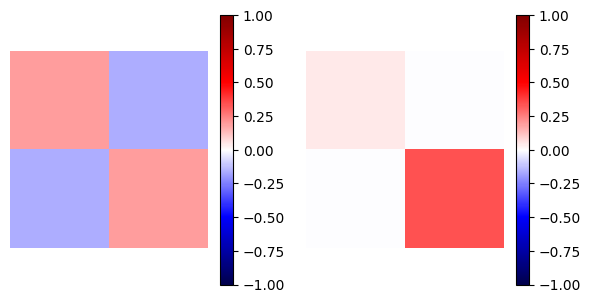

In [37]:
plt.figure(figsize=(7,3.5))
plt.subplot(1,2,1)
plt.imshow(mem_Sigma[n_trials//2-1], vmin=-1, vmax=1, cmap = 'seismic')
plt.colorbar()
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mem_Sigma[n_trials-1], vmin=-1, vmax=1, cmap = 'seismic')
plt.colorbar()
plt.axis('off')


